# Objective

I will perform exploratory data analysis on bank stocks from 2016 — 2017 and the Crunchbase Database. The EDA will be divided into two sections: Stocks and Crunchbase Databse, respectively. The following bank stocks that will be analyzed: 
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

# Data Collection

I will be utilizing pandas-datareader to read stock information directly from the Internet. The crunchbase database can be found in the github repository.

##### Imports

In [1]:
!pip install pandas-datareader
import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
%matplotlib inline

##### Data Retrieval

I will be retrieving the following bank stocks from Yahoo:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

In [2]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2017, 1, 1)

In [3]:
# Bank of America
BAC = data.DataReader('BAC', 'yahoo', start, end)

# CitiGroup
C = data.DataReader('C', 'yahoo', start, end)

# Goldman Sachs 
GS = data.DataReader('GS', 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader('JPM', 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader('MS', 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader('WFC', 'yahoo', start, end)

In [4]:
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], 'yahoo', start, end)

# Part 1: Exploratory Data Analysis — Bank Stocks

##### Add a Column_Company Name

In [5]:
BAC['Company']='BOA'
C['Company']='Citi'
GS['Company']='GoldmanSachs'
JPM['Company']='JPMorgan'
MS['Company']='MorganStanley'
WFC['Company']='WellsFargo'

Need to reset the index because currently the column 'Date' has been set as the index.

In [6]:
BAC.reset_index(inplace = True, drop = False)
WFC.reset_index(inplace = True, drop = False)
C.reset_index(inplace = True, drop = False)
JPM.reset_index(inplace = True, drop = False)
GS.reset_index(inplace = True, drop = False)
MS.reset_index(inplace = True, drop = False)

In [7]:
df.head()

Attributes  Adj Close                                                          \
Symbols           BAC          C          GS        JPM         MS        WFC   
Date                                                                            
2016-01-04  15.289828  47.502300  166.485992  56.965961  28.655018  46.564404   
2016-01-05  15.289828  47.251461  163.619415  57.064453  28.472967  46.546799   
2016-01-06  14.964115  46.563961  159.625031  56.240677  27.762959  45.657928   
2016-01-07  14.424364  44.185600  154.719009  53.966335  26.379364  44.355438   
2016-01-08  14.145183  42.857063  154.079895  52.757534  25.833206  43.616177   

Attributes  Close                                    ...        Open  \
Symbols       BAC          C          GS        JPM  ...          GS   
Date                                                 ...               
2016-01-04  16.43  51.130001  177.139999  63.619999  ...  175.789993   
2016-01-05  16.43  50.860001  174.089996  63.730000  ...  176.710007   
2016-01-06  16.08  50.119999  169.839996  62.810001  ...  171.309998   
2016-01-07  15.50  47.560001  164.619995  60.270000  ...  166.669998   
2016-01-08  15.20  46.130001  163.940002  58.919998  ...  166.750000   

Attributes                                        Volume              \
Symbols           JPM         MS        WFC          BAC           C   
Date                                                                   
2016-01-04  63.950001  30.700001  53.090000  114888000.0  23440200.0   
2016-01-05  63.700001  31.480000  52.930000   66670000.0  17444900.0   
2016-01-06  62.720001  30.629999  52.119999  102760800.0  22501800.0   
2016-01-07  61.459999  29.879999  51.009998  116255900.0  37902900.0   
2016-01-08  61.130001  29.410000  50.799999  124782400.0  30643000.0   

Attributes                                                 
Symbols            GS         JPM          MS         WFC  
Date                                                       
2016-01-04  3745500.0  25393200.0  15749200.0  25985400.0  
2016-01-05  4521600.0  16566700.0   9850500.0  14759600.0  
2016-01-06  5539400.0  22961500.0  13057400.0  20026400.0  
2016-01-07  5687900.0  27630900.0  18138200.0  30425600.0  
2016-01-08  4929800.0  22373300.0  15295600.0  22981400.0  

[5 rows x 36 columns]

##### Plotting the closing prices of BAC

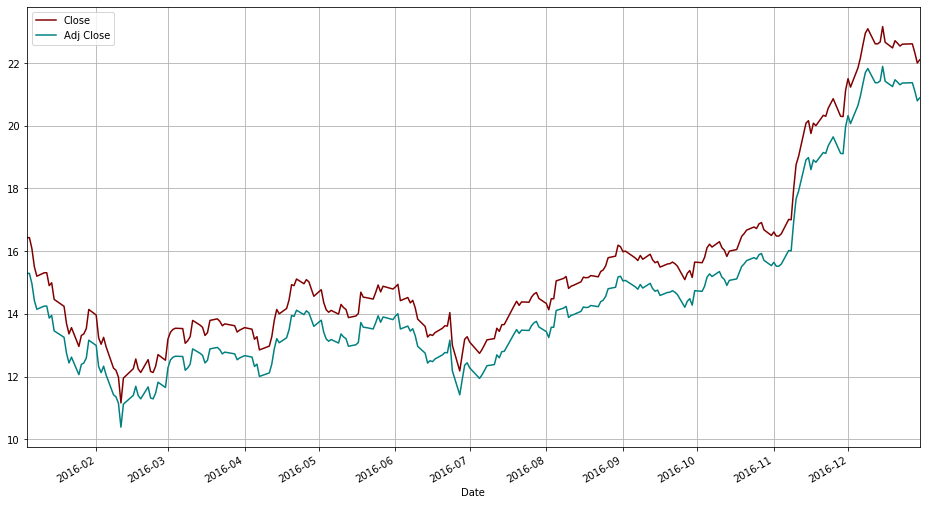

In [8]:
BAC.plot(x='Date', y=['Close', 'Adj Close'], figsize=(16,9), grid=True,color=['maroon','teal'])

##### Append all the data sets

In [9]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [10]:
stocks =pd.concat([BAC,C,GS,JPM,MS,WFC], axis = 0)

In [11]:
stocks

,Date,High,Low,Open,Close,Volume,Adj Close,Company
0,2016-01-04,16.490000,16.250000,16.450001,16.430000,114888000.0,15.289828,BOA
1,2016-01-05,16.590000,16.230000,16.520000,16.430000,66670000.0,15.289828,BOA
2,2016-01-06,16.290001,16.020000,16.190001,16.080000,102760800.0,14.964115,BOA
3,2016-01-07,15.900000,15.440000,15.730000,15.500000,116255900.0,14.424364,BOA
4,2016-01-08,15.940000,15.160000,15.940000,15.200000,124782400.0,14.145183,BOA
...,...,...,...,...,...,...,...,...
247,2016-12-23,55.980000,55.619999,55.779999,55.959999,8313000.0,50.831436,WellsFargo
248,2016-12-27,56.099998,55.840000,55.900002,55.950001,8893900.0,50.822350,WellsFargo
249,2016-12-28,56.080002,55.270000,55.980000,55.320000,10609100.0,50.250080,WellsFargo
250,2016-12-29,55.459999,54.480000,55.189999,54.840000,15933500.0,49.814072,WellsFargo


##### Average closing price for each bank

In [12]:
avg_close = stocks.groupby('Company', as_index=False).agg({'Close':'mean','Adj Close':'mean'})

In [13]:
avg_close.head()

,Company,Close,Adj Close
0,BOA,15.431905,14.472878
1,Citi,46.386111,43.279106
2,GoldmanSachs,169.113809,160.257255
3,JPMorgan,65.622817,59.473429
4,MorganStanley,29.848135,27.566326


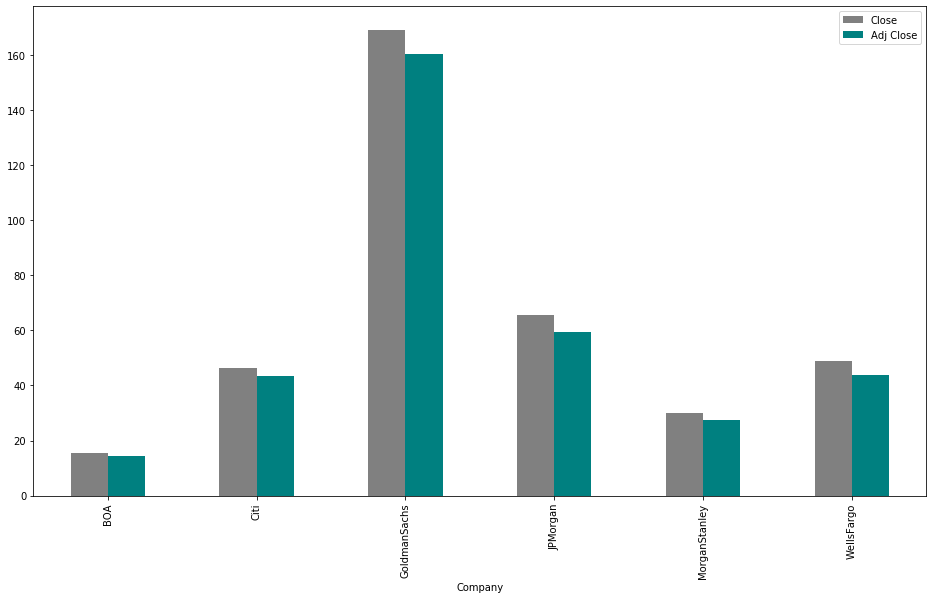

In [14]:
stocks.groupby('Company')['Close','Adj Close'].mean().plot(figsize=(16,9), kind='bar',color=['grey','teal'])

##### Max Close price for each bank's stock throughout the time period

In [15]:
max_close= print(df['Close'].max())

Symbols
BAC     23.160000
C       61.090000
GS     243.089996
JPM     87.129997
MS      43.730000
WFC     57.290001
dtype: float64


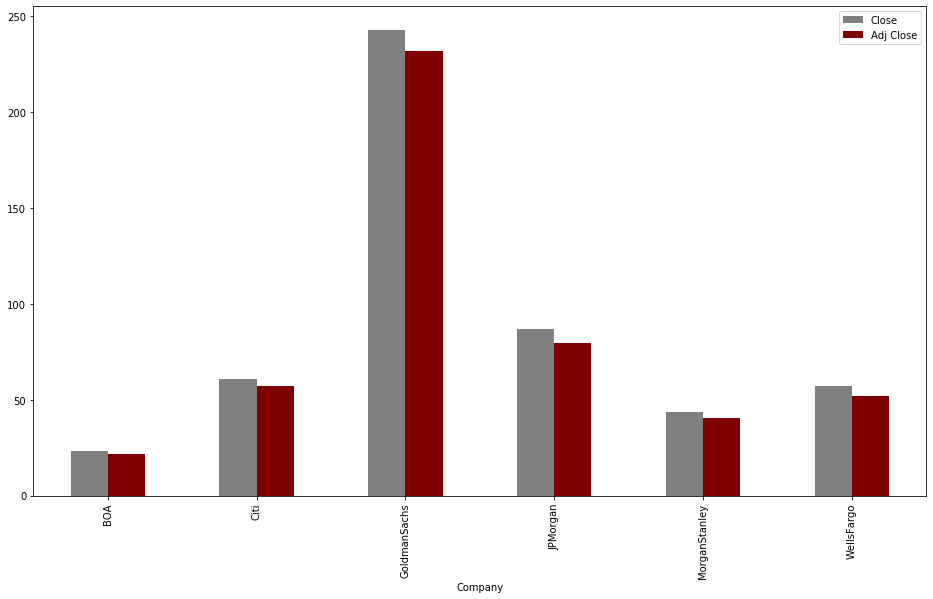

In [16]:
stocks.groupby('Company')['Close','Adj Close'].max().plot(figsize=(16,9),kind='bar',color=['grey','maroon'])

# Returns

This dataframe will contain the returns for each bank's stock. returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [17]:
returns = df['Close'].apply(lambda x: x.pct_change())
returns.columns = list(map(lambda x: x+' Return', returns.columns))
returns.dropna(inplace=True)
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2016-01-05,0.000000,-0.005281,-0.017218,0.001729,-0.006353,-0.000378
2016-01-06,-0.021303,-0.014550,-0.024413,-0.014436,-0.024936,-0.019096
2016-01-07,-0.036070,-0.051077,-0.030735,-0.040439,-0.049836,-0.028527
2016-01-08,-0.019355,-0.030067,-0.004131,-0.022399,-0.020704,-0.016667
2016-01-11,0.007237,0.015608,0.010919,-0.001527,0.002819,0.010694


### Best Days for each Bank

In [18]:
returns.idxmax()

BAC Return   2016-02-12
C Return     2016-02-12
GS Return    2016-11-09
JPM Return   2016-02-12
MS Return    2016-11-09
WFC Return   2016-11-10
dtype: datetime64[ns]

### Worst Days for each Bank 

In [19]:
returns.idxmin()

BAC Return   2016-06-24
C Return     2016-06-24
GS Return    2016-06-24
JPM Return   2016-06-24
MS Return    2016-06-24
WFC Return   2016-06-24
dtype: datetime64[ns]

# Insights

### Best Days
* BOA, Citi, and JP Morgan's highest return was on February 12, 2016 — British Prime Minister David Cameron's Brexit Vote Announcement
* <i>Source: </i>
 * https://en.wikipedia.org/wiki/2015%E2%80%9316_stock_market_selloff
* Goldman Sachs and Morgan Stanley's highest return was on Novemeber 9, 2019 — the day Donald J. Trump was elected as the 45th President of the United States; Wells Fargo's highest return followed the next day. Many investors anticpated Trump's presidencey will result in fewer regulations for banks.
* Furthermore, Goldman Sachs announced that it has invited 84 individuals to become Partners of the firm.
* <i>Source: </i>
 * https://money.cnn.com/2016/11/09/investing/dow-jones-trump-wins-election/index.html
 * https://www.goldmansachs.com/media-relations/press-releases/archived/2016/partners-announcement-09-nov-2016.html

### Worst Days
* The Lowest Return Date for all of the banks occured on June 24, 2016 — mainly due to Brexit Backlash.

# Evaluating Stock Fluctuation

In [20]:
returns.std()

BAC Return    0.020209
C Return      0.020060
GS Return     0.016886
JPM Return    0.015472
MS Return     0.020555
WFC Return    0.015015
dtype: float64

<b>Riskiest Stock</b>
* Because of <b>Morgan Stanley</b>'s high variability — sporting the highest standard deviation of all of the other stocks — it is the riskiest of the bunch. However, it is not too far ahead of <b>Bank of America</b> and <b>Citi Group</b>.

# Density Plot

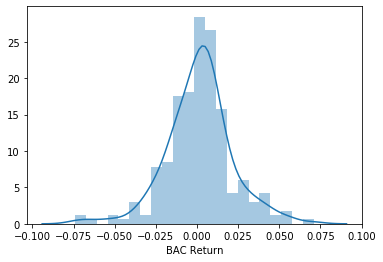

In [21]:
sns.distplot(returns['BAC Return'])

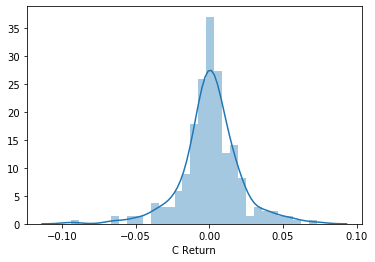

In [22]:
sns.distplot(returns['C Return'])

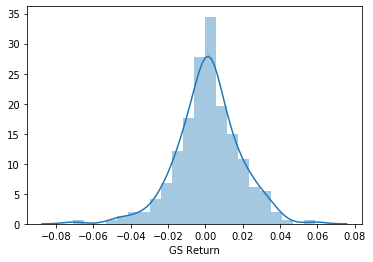

In [23]:
sns.distplot(returns['GS Return'])

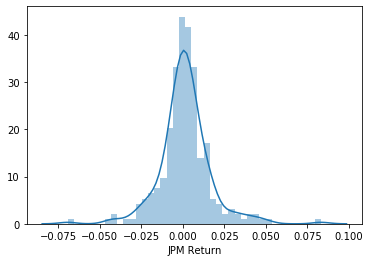

In [24]:
sns.distplot(returns['JPM Return'])

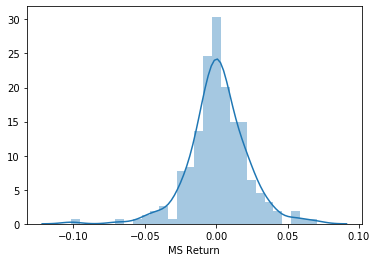

In [25]:
sns.distplot(returns['MS Return'])

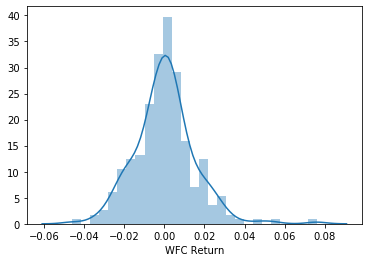

In [26]:
sns.distplot(returns['WFC Return'])

### Moving Averages

** Please derive the moving averages for these stocks in the year 2016. Use .rolling() in pandas to get the rolling average calculation. ** 

In [27]:
close_price = stocks[['Company','Close','Date']]
close_price = close_price.pivot_table('Close', index='Date', columns='Company')
close_price_rolling = close_price.rolling(window=30).mean()

In [28]:
close_price.head()

Company,BOA,Citi,GoldmanSachs,JPMorgan,MorganStanley,WellsFargo
Date,,,,,,
2016-01-04,16.43,51.130001,177.139999,63.619999,31.480000,52.910000
2016-01-05,16.43,50.860001,174.089996,63.730000,31.280001,52.889999
2016-01-06,16.08,50.119999,169.839996,62.810001,30.500000,51.880001
2016-01-07,15.50,47.560001,164.619995,60.270000,28.980000,50.400002
2016-01-08,15.20,46.130001,163.940002,58.919998,28.379999,49.560001


In [29]:
test = pd.merge(close_price_rolling['BOA'],close_price['BOA'],on='Date', how='left')
test.head()

,BOA_x,BOA_y
Date,,
2016-01-04,NaN,16.43
2016-01-05,NaN,16.43
2016-01-06,NaN,16.08
2016-01-07,NaN,15.50
2016-01-08,NaN,15.20


In [30]:
am_boa=test.rename(columns={"BOA_x": "ClosePrice_MovingAvg", "BOA_y": "ClosePrice"})
am_boa.reset_index(inplace=True, drop=False)

##### Plotting the rolling 30-day average against the Close Price for Bank Of America's stock for the year 2016

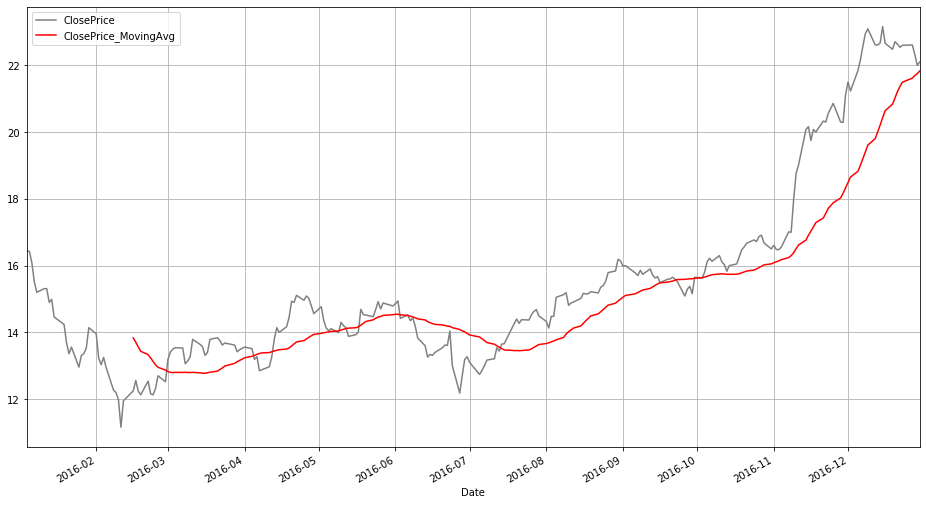

In [31]:
am_boa.plot(x='Date', y=['ClosePrice', 'ClosePrice_MovingAvg'], figsize=(16,9), grid=True,color=['grey','red'])

##### Correlation Heat Map between the stocks Close Price.

In [32]:
stock_close = df['Close']
stock_close_corr = stock_close.corr()

In [33]:
print(stock_close_corr)

Symbols       BAC         C        GS       JPM        MS       WFC
Symbols                                                            
BAC      1.000000  0.983725  0.983602  0.973124  0.982103  0.677793
C        0.983725  1.000000  0.953732  0.967837  0.968600  0.653235
GS       0.983602  0.953732  1.000000  0.956631  0.956347  0.733594
JPM      0.973124  0.967837  0.956631  1.000000  0.970827  0.628673
MS       0.982103  0.968600  0.956347  0.970827  1.000000  0.576035
WFC      0.677793  0.653235  0.733594  0.628673  0.576035  1.000000


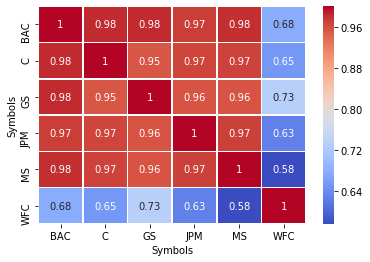

In [34]:
sns.heatmap(stock_close_corr, annot = True, cmap='coolwarm',  linewidths=.5)

# Part 2: Exploratory Data Analysis — Crunchbase Database

Please generate some visualization using the crunchbase database you downloaded for the midterm. Feel free to use any plotting packages (in Python), and generate any types of figures. You may also comment on the generated figures, and explain any insights you have obtained.

In [35]:
import sqlite3

In [36]:
test = sqlite3.connect("crunchbase_analysis.db")

In [37]:
df2 = pd.read_sql_query("SELECT * FROM crunchbase_companies", test)
df3 = pd.read_sql_query("SELECT * FROM crunchbase_investments", test)
df4 = pd.read_sql_query("SELECt * FROM crunchbase_acquisitions", test)

In [38]:
df2.head()

,permalink,name,homepage_url,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_at_clean,id
0,/company/8868,8868,http://www.8868.cn,None,NaN,operating,None,None,unknown,None,1.0,None,None,1
1,/company/21e6,2.10E+07,None,None,5050000.0,operating,USA,CA,SF Bay,San Francisco,1.0,1/1/13,2013-01-01,2
2,/company/club-domains,.Club Domains,http://dotclub.com,software,7000000.0,operating,USA,FL,Fort Lauderdale,Oakland Park,1.0,10/10/11,2011-10-10,3
3,/company/fox-networks,.Fox Networks,http://www.dotfox.com,advertising,4912394.0,closed,ARG,None,Buenos Aires,Buenos Aires,1.0,None,None,4
4,/company/a-list-games,[a]list games,http://www.alistgames.com,games_video,9300000.0,operating,None,None,unknown,None,1.0,None,None,5


In [39]:
df3.head()

,company_permalink,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_category_code,...,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd,id
0,/company/tokita-investments,Tokita Investments,consulting,JPN,None,TBD,Okinawa Ken,/company/01startups,01Startups,None,...,None,unknown,None,angel,9/26/13,2013-09,2013-Q3,2013.0,5000.0,1
1,/company/advercar,AdverCar,advertising,USA,CA,SF Bay,San Francisco,/company/1-800-flowers-com,1-800-FLOWERS.COM,ecommerce,...,NY,New York,New York,series-a,10/30/12,2012-10,2012-Q4,2012.0,2000000.0,2
2,/company/launchgram,LaunchGram,news,USA,CA,SF Bay,Mountain View,/company/10xelerator,10Xelerator,finance,...,OH,Columbus,Columbus,other,1/23/12,2012-01,2012-Q1,2012.0,20000.0,3
3,/company/utap,uTaP,messaging,USA,None,United States - Other,None,/company/10xelerator,10Xelerator,finance,...,OH,Columbus,Columbus,other,1/1/12,2012-01,2012-Q1,2012.0,20000.0,4
4,/company/zoopshop,ZoopShop,software,USA,OH,Columbus,columbus,/company/10xelerator,10Xelerator,finance,...,OH,Columbus,Columbus,angel,2/15/12,2012-02,2012-Q1,2012.0,20000.0,5


In [40]:
df4.head()

,company_permalink,acquirer_permalink,acquirer_name,acquirer_category_code,acquirer_country_code,acquirer_state_code,acquirer_region,acquirer_city,price_amount,price_currency_code,acquired_at,acquired_at_cleaned,id
0,/company/waywire,/company/magnify,Magnify,games_video,USA,NY,New York,New York,NaN,USD,10/17/13,2013-10-17 00:00:00,1
1,/company/1-nation-technology,/company/vology,Vology,other,None,None,unknown,None,NaN,USD,1/1/06,2006-01-01 00:00:00,2
2,/company/1-stop-financial-service-centers-of-a...,/company/confie-seguros,Confie Seguros,enterprise,USA,CA,Los Angeles,Buena Park,NaN,USD,2/3/14,2014-02-03 00:00:00,3
3,/company/1-800-contacts-2,/company/thomas-h-lee-partners,Thomas H. Lee Partners,None,USA,MA,Boston,Boston,NaN,USD,1/7/14,2014-01-07 00:00:00,4
4,/company/1000memories,/company/ancestry-com,Ancestry,ecommerce,USA,UT,Salt Lake City,Provo,NaN,USD,10/3/12,2012-10-03 00:00:00,5


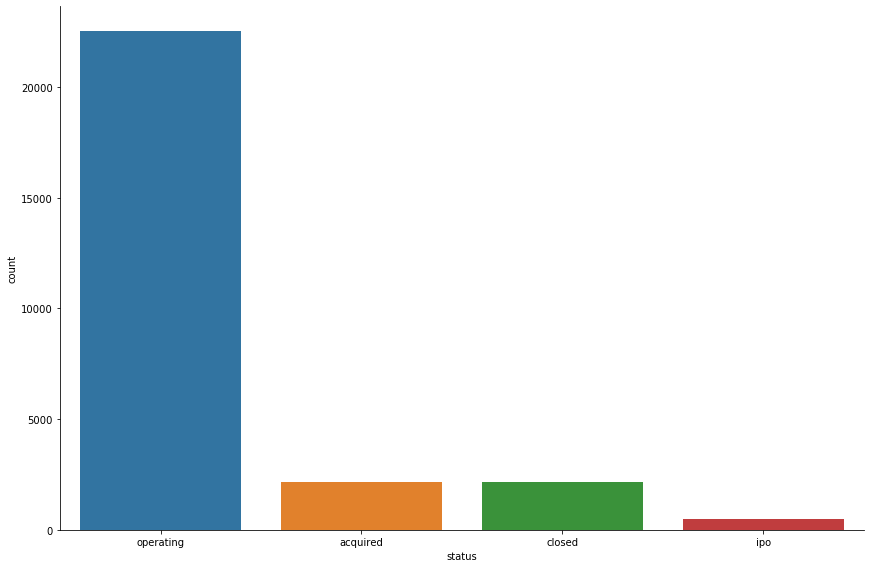

In [41]:
sns.catplot(x='status',
            kind='count',
            height=8, 
            aspect=1.5,
            order=df2.status.value_counts().head(4).index,
            data=df2)

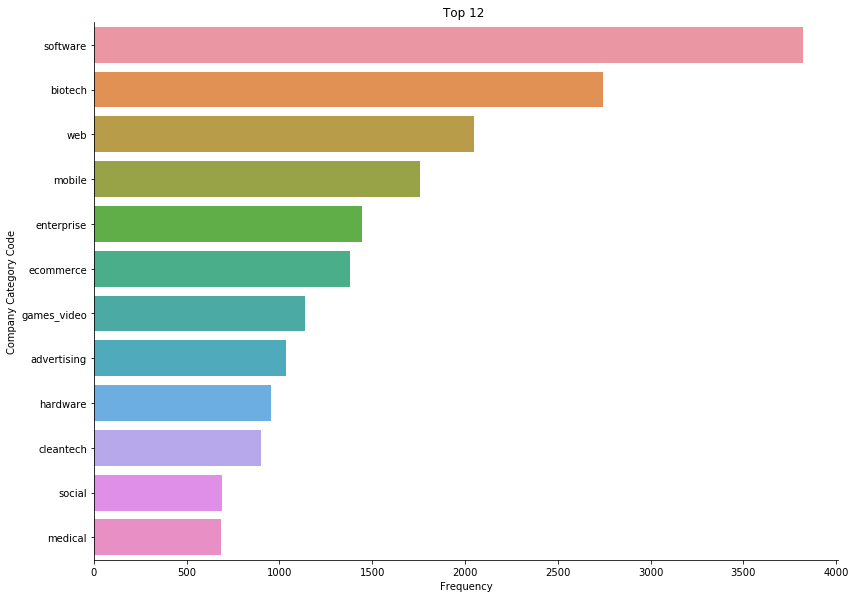

In [42]:
a = sns.catplot(y='category_code',
                kind='count',
                height=8, 
                aspect=1.5,
                order=df2.category_code.value_counts().head(12).index,
                data=df2)

plt.title('Top 12 ')
a.set(xlabel='Frequency', ylabel='Company Category Code')
plt.show()

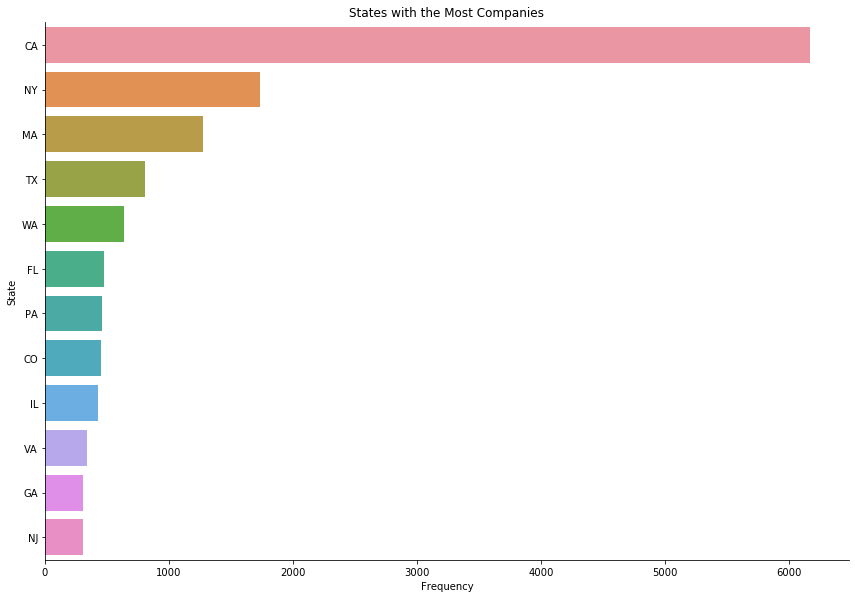

In [43]:
a = sns.catplot(y='state_code',
                kind='count',
                height=8, 
                aspect=1.5,
                order=df2.state_code.value_counts().head(12).index,
                data=df2)

plt.title('States with the Most Companies')
a.set(xlabel='Frequency', ylabel='State')
plt.show()

Majority of the companies from the database are from California, New York, and Massachusetts.

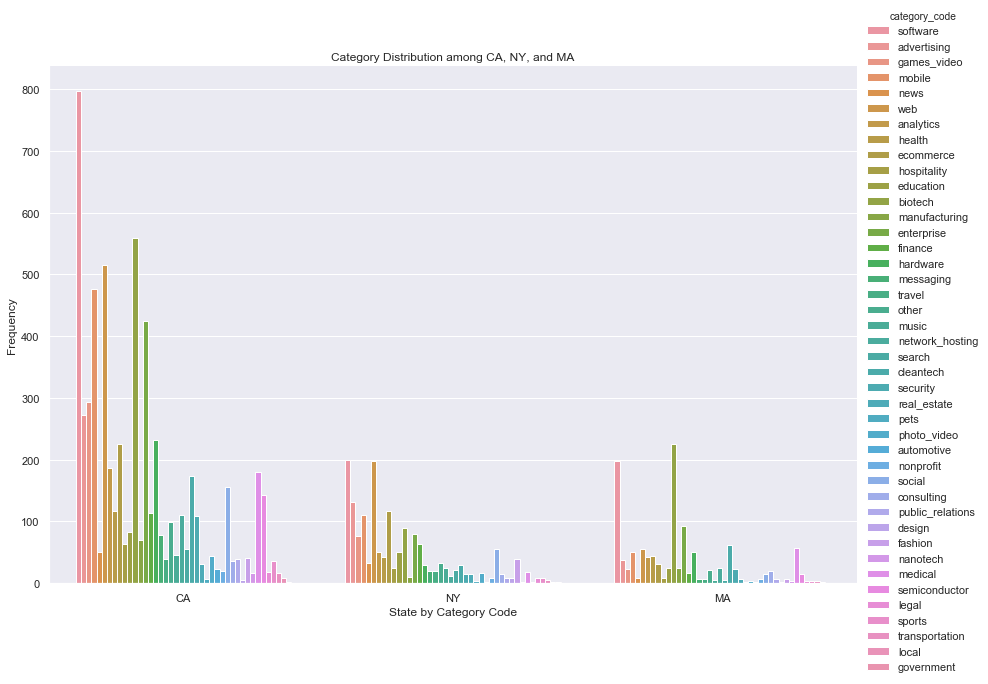

In [44]:
sns.set(style="darkgrid")
a = sns.catplot(x='state_code',
                hue='category_code',
                kind="count",
                height=8, 
                aspect=1.5,
                order=df2.state_code.value_counts().iloc[:3].index,
                data=df2)

plt.title('Category Distribution among CA, NY, and MA')
a.set(xlabel='State by Category Code', ylabel='Frequency')
plt.show()

Based on those top three states with the most companies, software is the most frequent category code in California and New York. Biotech is the most frequent in Massachusetts.

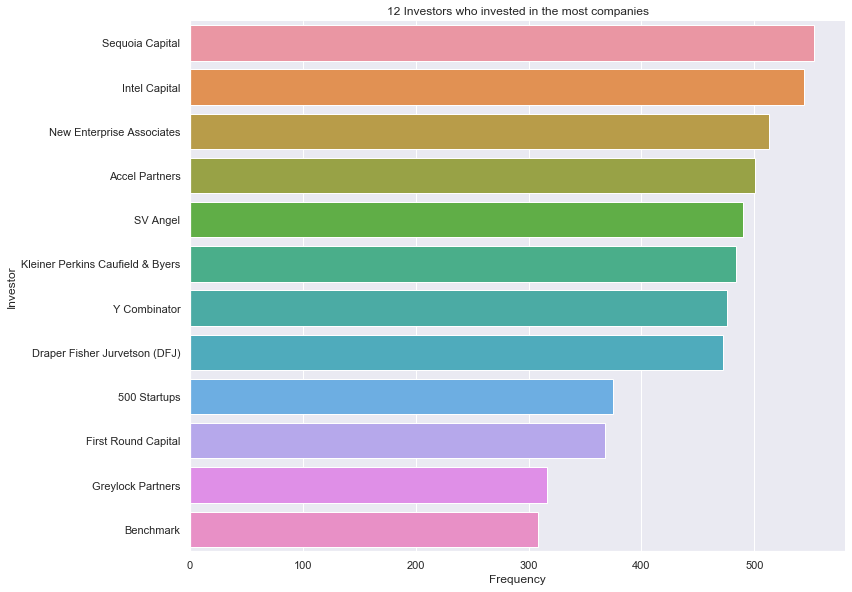

In [45]:
a = sns.catplot(y='investor_name',
                kind='count',
                height=8, 
                aspect=1.5,
                order=df3.investor_name.value_counts().head(12).index,
                data=df3)

plt.title('12 Investors who invested in the most companies')
a.set(xlabel='Frequency', ylabel='Investor')
plt.show()

The top three investors that invested into the most companies is Sequoia Capital, Intel Capital, and New Enterprise Associates.

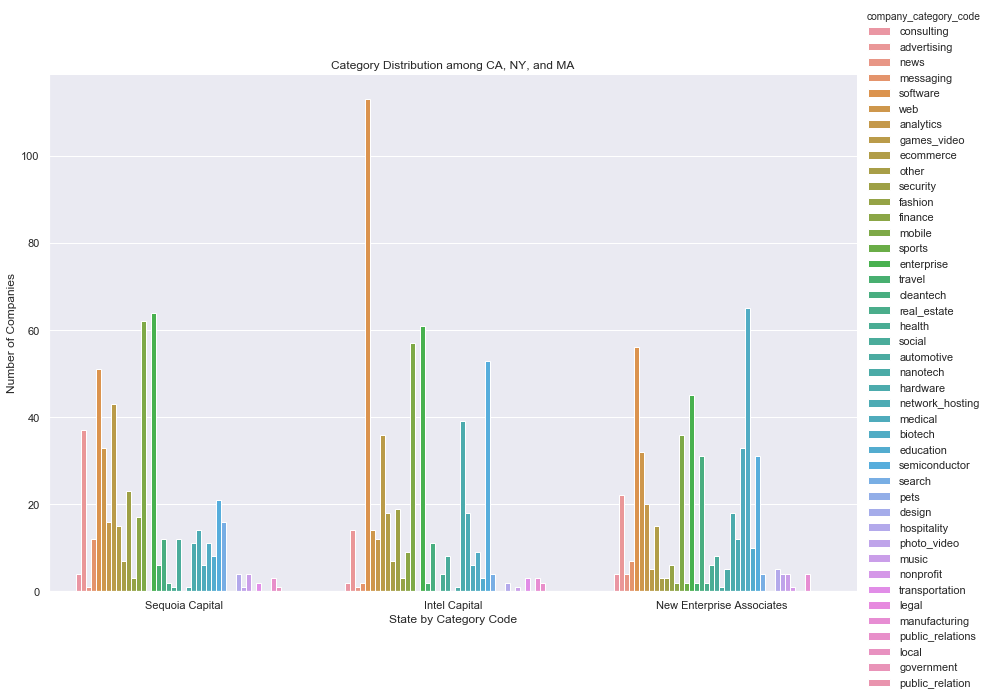

In [46]:
sns.set(style="darkgrid")
a = sns.catplot(x='investor_name',
                hue='company_category_code',
                kind="count",
                height=8, 
                aspect=1.5,
                order=df3.investor_name.value_counts().iloc[:3].index,
                data=df3)

plt.title('Category Distribution among CA, NY, and MA')
a.set(xlabel='State by Category Code', ylabel='Number of Companies')
plt.show()


We are evaluating the top 3 investors that invested in the most number of companies: Sequoia Capital, Intel Capital, and New Enterprise Associates. Intel Capital mainly invests in company that are in the software category. Sequoia Capital mostly invest in companies that are in the mobile or enterprise category. New Enterprise Associates typically invest in the search and software category.